## Introduction

Powerlifting is a strength sport that consists of three attempts at maximal weight on three lifts: squat, bench press, and deadlift. As in the sport of Olympic weightlifting, it involves the athlete attempting three maximal attempts of each movement. Powerlifting evolved from a sport known as "odd lifts", which followed the same three-attempt format but used a wider variety of events, akin to strongman competition. Eventually odd lifts became standardized to the current three.

In competition, lifts may be performed equipped or un-equipped (typically referred to as 'raw' lifting or 'classic' in the International Powerlifting Federation specifically). Equipment in this context refers to a supportive bench shirt or squat/deadlift suit or briefs which provide additinal support and allows the lifter to handle more weight. Weight belts, knee sleeves, wrist wraps and special footwear may be used in 'raw' lifting.

Competitions take place across the world. Powerlifting has been a Paralympic sport (bench press only) since 1984 and, under the IPF, is also a World Games sport. Local, national and international competitions have also been sanctioned by other federations operating independently of the IPF.

With powerlifting gaining popularity quickly we'll see how fast it has actual grown and some of the reasons why it has gained so much traction in recent years. There is a common 'feud' among non drug tested federations and drug tested federation and we'll see if there is an actual difference between these two groups. Drug usage can only take a lifter so far and to be truly the best a number of factors come into play other than performance enhancing drugs. Furthermore we'll investigated some of the key factors of total weight lifted. In conclusion some modeling of the data will be done and a solution for a new, more fair, Wilks formula will be attempted.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Powerlifting)

Acknowledgement: [OpenPowerlifting](https://www.openpowerlifting.org/) for providing a snapshot of their database.

Terminology:
* **Raw**: Lifter competes only in weight belt, knee sleeves, wrist wraps, singlet
* **Bomb**: Lifter completes atleast one attempt of each lift
* **Full Power**: A meet consisting of all three lifts (squat, bench, deadlift)
* **Wilks point**: A score to compare lifters across gender and bodyweight
* **Wilks coefficient**: The coefficient based on gender and bodyweight to multiply by total weight lifters (KG) to get Wilks point

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.max_columns', 500)

## 2. Reading/Preparing the Data

We want our data to fit the following criteria
* Age was included
* Bodyweight was included
* Whether or not was tested is included
* Didn't bomb
* Wilks was included
* Competed raw
* Competed in full power meet (SBD)

In [2]:
pl = pd.read_csv("openpowerlifting.csv")
print(pl.shape)
pl.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(911485, 36)


,Name,Sex,Event,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Tested,AgeClass,Country,Glossbrenner,Federation,Date,MeetCountry,MeetState,MeetName
0,Angie Belk Terry,F,SBD,Wraps,47.0,Mst 45-49,59.60,60,38.56,47.63,-54.43,NaN,47.63,15.88,20.41,-24.95,NaN,20.41,61.23,70.31,-77.11,NaN,70.31,138.35,1,155.05,167.76,No,45-49,NaN,137.00,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...
1,Dawn Bogart,F,SBD,Single-ply,42.0,Mst 40-44,58.51,60,120.20,136.08,142.88,NaN,142.88,88.45,95.25,-97.52,NaN,95.25,136.08,149.69,163.29,NaN,163.29,401.42,1,456.38,465.50,No,40-44,NaN,403.37,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...
2,Dawn Bogart,F,SBD,Single-ply,42.0,Open Senior,58.51,60,120.20,136.08,142.88,NaN,142.88,88.45,95.25,-97.52,NaN,95.25,136.08,149.69,163.29,NaN,163.29,401.42,1,456.38,465.50,No,40-44,NaN,403.37,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...
3,Dawn Bogart,F,B,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,NaN,NaN,88.45,95.25,-97.52,NaN,95.25,NaN,NaN,NaN,NaN,NaN,95.25,1,108.29,110.46,No,40-44,NaN,95.71,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...
4,Destiny Dula,F,BD,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,NaN,NaN,29.48,31.75,-34.02,NaN,31.75,90.72,-97.52,NaN,NaN,90.72,122.47,1,130.47,138.29,No,18-19,NaN,115.19,365Strong,2016-10-29,USA,NC,Junior & Senior National Powerlifting Champion...


Now let's check how much of our data is missing.

In [3]:
pl.isna().mean().round(4) * 100

Name                0.00
Sex                 0.00
Event               0.00
Equipment           0.00
Age                34.52
Division            0.93
BodyweightKg        0.82
WeightClassKg       0.67
Squat1Kg           68.41
Squat2Kg           68.82
Squat3Kg           69.71
Squat4Kg           99.65
Best3SquatKg       32.90
Bench1Kg           53.92
Bench2Kg           54.51
Bench3Kg           55.88
Bench4Kg           99.15
Best3BenchKg        9.78
Deadlift1Kg        66.13
Deadlift2Kg        66.84
Deadlift3Kg        68.34
Deadlift4Kg        99.13
Best3DeadliftKg    26.66
TotalKg             6.09
Place               0.00
Wilks               6.71
McCulloch           6.71
Tested              0.00
AgeClass           42.14
Country            64.84
Glossbrenner        6.71
Federation          0.00
Date                0.00
MeetCountry         0.00
MeetState          44.64
MeetName            0.00
dtype: float64

We can see that we have quite a few irrelevant variables as well variables where a large proportion is missing, we'll discard these variables. However keep the Best3LiftKg since we will definitely need this variable, as well as filter for only raw full power lifters.

In [4]:
pl = pl.drop(['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'AgeClass', 'Country', 'MeetState'], axis=1)
pl = pl[pl['Event'] == 'SBD']
pl = pl[pl['Equipment'] == 'Raw']

In [5]:
pl.describe()

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner
count,183833.000000,241188.000000,237912.000000,237151.000000,237291.000000,232835.000000,232655.000000,232655.000000,232655.000000
mean,29.285071,83.236530,161.041372,105.620586,190.520587,458.843349,338.174810,348.998819,317.043359
std,11.617806,21.166201,59.580600,44.347138,60.067593,154.525276,66.394143,65.757361,67.021745
min,5.000000,17.690000,-407.850000,-235.000000,-347.500000,40.000000,37.290000,43.440000,35.880000
25%,21.000000,67.500000,115.000000,67.500000,140.600000,325.000000,294.690000,305.660000,271.320000
50%,26.000000,81.300000,160.000000,107.500000,192.500000,465.000000,339.700000,349.650000,318.880000
75%,34.500000,95.300000,202.500000,137.500000,235.000000,575.000000,382.760000,392.630000,363.230000
max,93.500000,258.000000,485.000000,322.500000,440.000000,1105.000000,634.840000,747.490000,587.310000


We have some negative values where it makes no sense so we'll take the absolute values assuming these are data entry errors and reformat the date

In [6]:
pl['Best3SquatKg'] = pl['Best3SquatKg'].abs()
pl['Best3BenchKg'] = pl['Best3BenchKg'].abs()
pl['Best3DeadliftKg'] = pl['Best3DeadliftKg'].abs()

pl['Year'] = pd.DatetimeIndex(pl['Date']).year  
pl = pl.drop(['Date'], axis=1)

print(pl.shape)
pl.isna().mean().round(4) * 100

(241412, 21)


Name                0.00
Sex                 0.00
Event               0.00
Equipment           0.00
Age                23.85
Division            0.33
BodyweightKg        0.09
WeightClassKg       0.63
Best3SquatKg        1.45
Best3BenchKg        1.77
Best3DeadliftKg     1.71
TotalKg             3.55
Place               0.00
Wilks               3.63
McCulloch           3.63
Tested              0.00
Glossbrenner        3.63
Federation          0.00
MeetCountry         0.00
MeetName            0.00
Year                0.00
dtype: float64

Since there are so little remaining missing values we'll just drop those rows. As for age I want to keep this variable so we'll replace all missing with the mean of the column.

In [7]:
pl = pl.dropna(subset = ['Division', 'BodyweightKg', 'WeightClassKg', 'TotalKg', 'Wilks', 'McCulloch', 'Glossbrenner'])
pl[['Age']] = pl[['Age']].fillna(pl['Age'].mean())

print(pl.shape)

(230486, 21)


## 3. Sport Growth Analysis

The sport is dominated by males so let's see what proportion are females and males.

In [8]:
print('Percentage of Male lifters: ', round(len(pl[pl['Sex']=='M'])/len(pl)*100),'%')
print('Percentage of Female lifters: ', round(len(pl[pl['Sex']=='F'])/len(pl)*100),'%')

Percentage of Male lifters:  66 %
Percentage of Female lifters:  34 %


Let's take a look at the growth of the sport over the years.

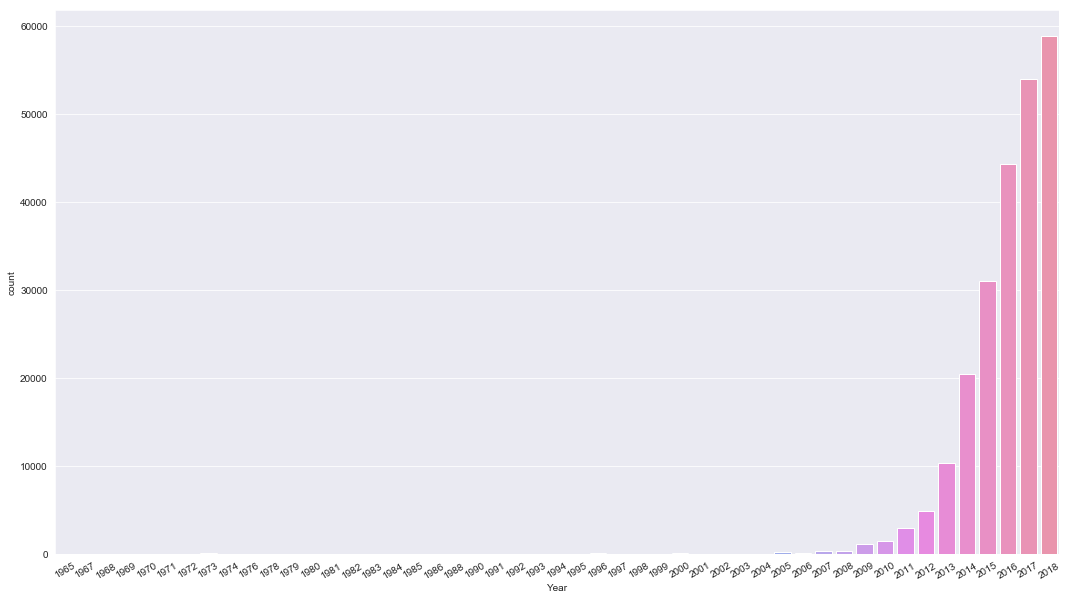

In [9]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(18,10))

t = sns.countplot(x='Year', data=pl)
t.set_xticklabels(t.get_xticklabels(), rotation=30)
plt.show()

There's an obvious spike in popularity around 2012 which continues till the current year. This was around when YouTube channels such as Omarisuf, Barbell Brigade, SuperTraining Gym, etc really picked up.

## 4. Tested vs. Non-tested

First let's see the distribution of tested and non-tested lifters, we will also group by gender as this is most likely another strong confounding variable. In this context tested means the lifter is subject to drug testing but this does not necessarily mean the lifter is tested.

In [10]:
print(pl['Tested'].value_counts())

Yes    178162
No      52324
Name: Tested, dtype: int64


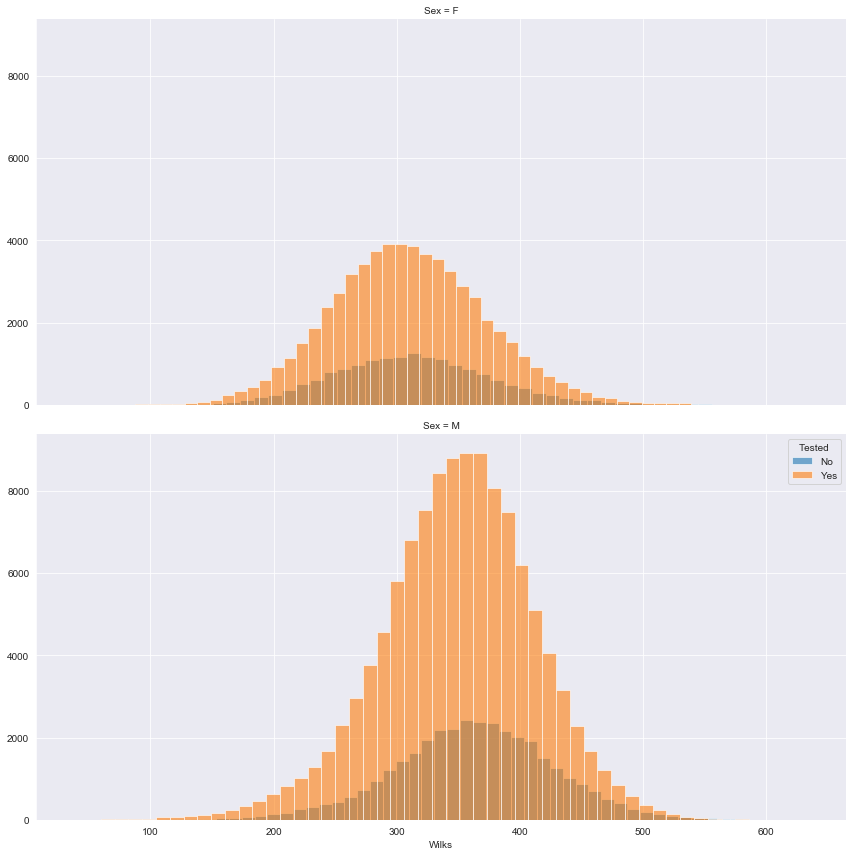

MEAN 
 Sex  Tested
F    No        312.949537
     Yes       309.420686
M    No        362.095294
     Yes       349.401438
Name: Wilks, dtype: float64


MEDIAN 
 Sex  Tested
F    No        310.83
     Yes       307.57
M    No        363.24
     Yes       351.79
Name: Wilks, dtype: float64


MAX 
 Sex  Tested
F    No        634.84
     Yes       558.86
M    No        601.50
     Yes       597.23
Name: Wilks, dtype: float64


In [11]:
grid = sns.FacetGrid(data=pl, hue='Tested', row='Sex', height=6, aspect=2)
wilks = grid.map(plt.hist, 'Wilks', bins=50, alpha=0.6)
plt.legend(title='Tested')
plt.show()

print("MEAN \n", pl.groupby(by=['Sex','Tested'])['Wilks'].mean())
print("\n\nMEDIAN \n", pl.groupby(by=['Sex', 'Tested'])['Wilks'].median())
print("\n\nMAX \n", pl.groupby(by=['Sex', 'Tested'])['Wilks'].max())

Here we can see that other from amount of people in each group the two distributions are relatively the same. The mean, median and max are slightly higher for the non-tested group which may be explained by drug use. However, my suspicion is that even though a lifter competes in a non-tested federation they are most likely not using performance enhancing drugs or are simply too novice to for it to make a significant difference. Where a more significant difference may lie is in the elite lifters nearing human capabilities. Performance enhancing drugs should raise a lifters potential, so let's compare only elite level lifters while still grouping by gender. Lets take the top lifters from each group.

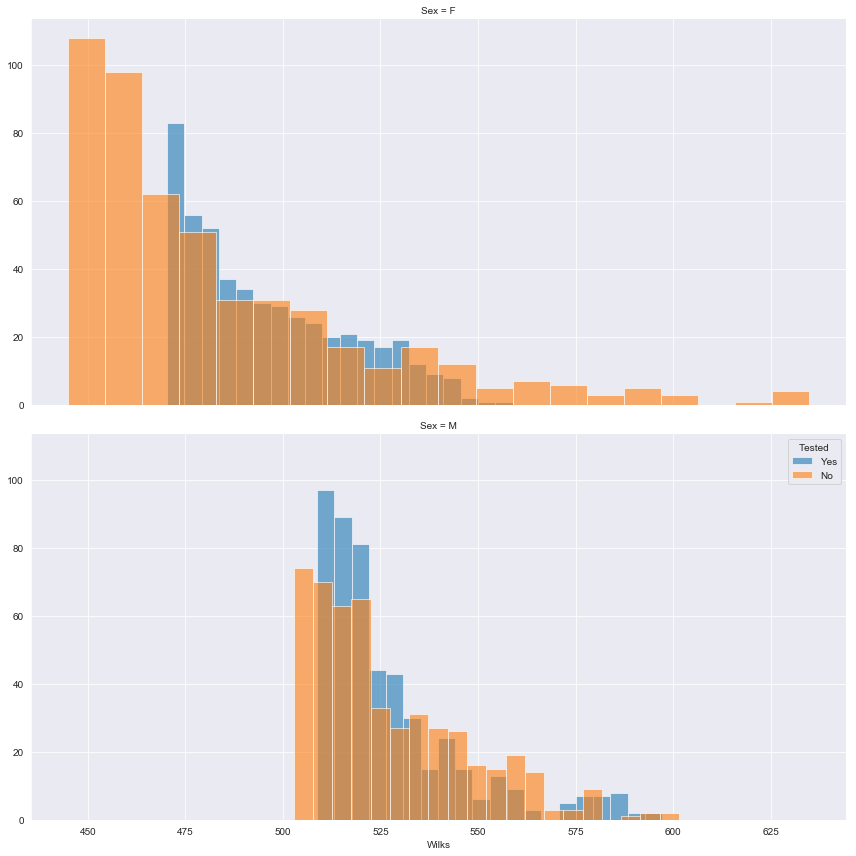

MEDIAN 
 Sex  Tested
F    No        470.840
     Yes       490.600
M    No        520.950
     Yes       521.305
Name: Wilks, dtype: float64


MEAN 
 Sex  Tested
F    No        483.17302
     Yes       495.84298
M    No        527.03608
     Yes       527.71098
Name: Wilks, dtype: float64


MAX 
 Sex  Tested
F    No        634.84
     Yes       558.86
M    No        601.50
     Yes       597.23
Name: Wilks, dtype: float64


MAX 
 Sex  Tested
F    No        1416.354828
     Yes        432.184958
M    No         405.335268
     Yes        355.306055
Name: Wilks, dtype: float64


In [12]:
# Prep groups
female_tested = pl[pl['Sex'] == 'F']
female_tested = female_tested[female_tested['Tested'] == 'Yes']
female_tested = female_tested.sort_values('Wilks', ascending=False)[0:500]

female_not_tested = pl[pl['Sex'] == 'F']
female_not_tested = female_not_tested[female_not_tested['Tested'] == 'No']
female_not_tested = female_not_tested.sort_values('Wilks', ascending=False)[0:500]

male_tested = pl[pl['Sex'] == 'M']
male_tested = male_tested[male_tested['Tested'] == 'Yes']
male_tested = male_tested.sort_values('Wilks', ascending=False)[0:500]

male_not_tested = pl[pl['Sex'] == 'M']
male_not_tested = male_not_tested[male_not_tested['Tested'] == 'No']
male_not_tested = male_not_tested.sort_values('Wilks', ascending=False)[0:500]

frames = [female_tested, female_not_tested, male_tested, male_not_tested]
result = pd.concat(frames)

grid = sns.FacetGrid(data=result, hue='Tested', row='Sex', legend_out=True, height=6, aspect=2)
top_wilks = grid.map(plt.hist, 'Wilks', bins=20, alpha=0.6)
plt.legend(title='Tested')
plt.show()

print("MEDIAN \n",result.groupby(by=['Sex','Tested'])['Wilks'].median())
print("\n\nMEAN \n",result.groupby(by=['Sex','Tested'])['Wilks'].mean())
print("\n\nMAX \n",result.groupby(by=['Sex','Tested'])['Wilks'].max())
print("\n\nMAX \n",result.groupby(by=['Sex','Tested'])['Wilks'].var())

We can see some more interesting results here. There's a large gap between female tested and untested lifters with the top untested lifter 76 points ahead of the top tested lifter. Whereas in males there is much less of a gap where the top lifter in each group are nearly identical in Wilks points. Additionally, we can see that for females there are similar amounts of elite lifters in both groups however there are several untested females scoring higher than the top tested female.

Now that we've visualized the data let's try to confirm our suspicions by doing hypothesis testing. Lets start by comparing the female tested and female non-tested groups. Since our two groups are definitely not normally distributed we'll use a non-parametric test to test if the two groups come from the same population. <br> <br>
$$H_0: F_{Untested} = F_{Tested} \\
H_A: F_{Untested} \neq F_{Tested}$$

In [13]:
# Prep our two groups
female_tested = female_tested[['Wilks']]
female_not_tested = female_not_tested[['Wilks']]
male_tested = male_tested[['Wilks']]
male_not_tested = male_not_tested[['Wilks']]

print(stats.mannwhitneyu(female_not_tested, female_tested, alternative = "two-sided"))
print(stats.mannwhitneyu(male_not_tested, male_tested, alternative = "two-sided"))

MannwhitneyuResult(statistic=75790.5, pvalue=4.480133688787888e-27)
MannwhitneyuResult(statistic=117274.5, pvalue=0.09071881407268141)


For the female group the p-value is well below 0.05 so we can reject the null hypothesis that the two distributions are the same. While the male group has a p-value of 0.091 which is not enough to reject the null hypothesis at a 5% significance level.

## 5. How Age, Gender & Bodyweight Effect Weight Lifted

Let's first compare how age effects weight lifted while still grouping by gender.

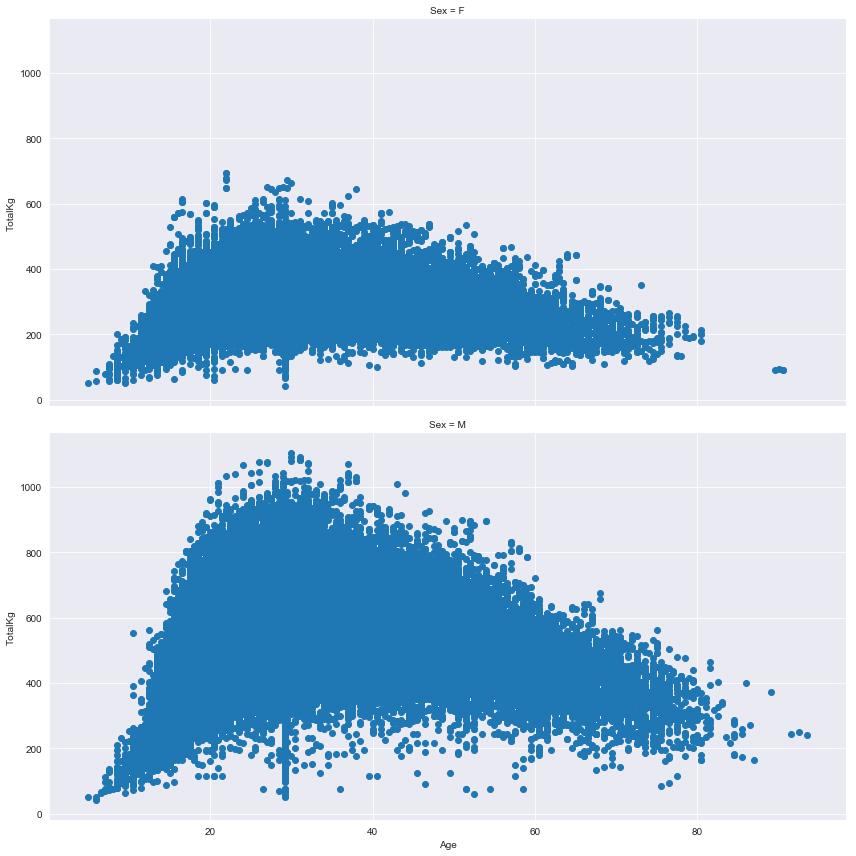

In [14]:
grid = sns.FacetGrid(data=pl, row='Sex', legend_out=True, height=6, aspect=2)
a = grid.map(plt.scatter, 'Age', 'TotalKg')
plt.show()

We can see that there is an obvious peak at about age 25 with a decline after that, which makes sense in the sport of powerlifing. Most lifters will hit a peak at around 25 while they are still young but have had enough time to train then age or life starts to hit them and their lifts decrease.

Let's now do the same plots with bodyweight.

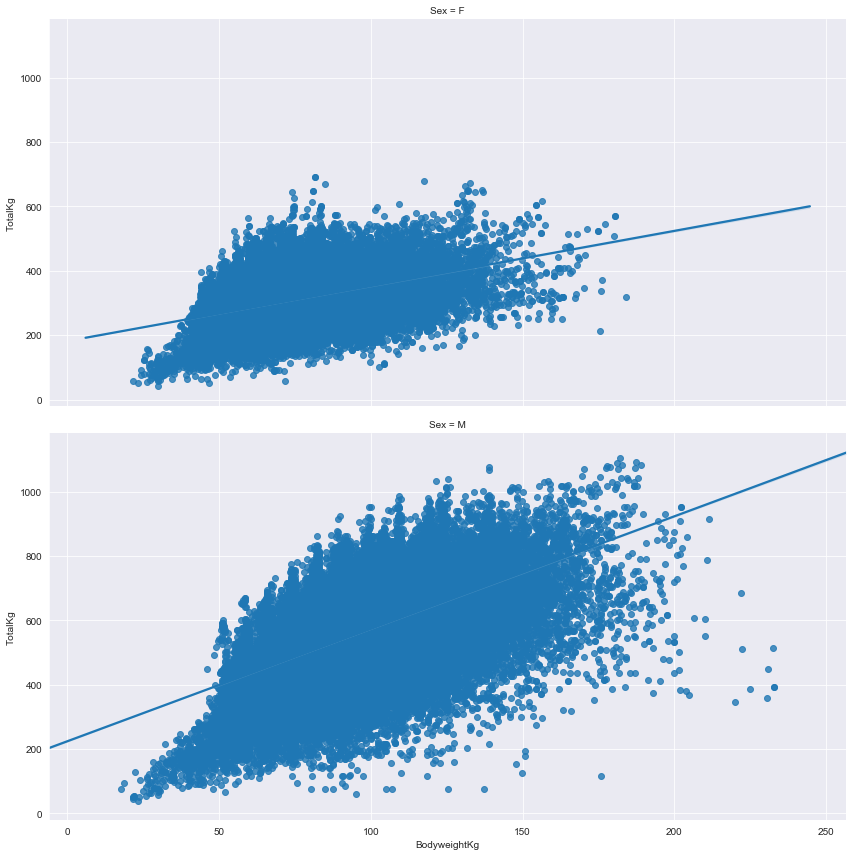

In [15]:
bw = sns.lmplot(data=pl, x='BodyweightKg', y='TotalKg', row='Sex', height=6, aspect=2)
plt.show()

Again nothing too surprising here, a clear positive correlation can be seen between bodyweight and weight lifted. However there seems to be a higher slope for males compared to females. This may be because in general males can be put on more muscle mass leading to heavier lifts.

## 6. Modeling the Data

Since Wilks itself is just that formula that takes gender, bodyweight, and weight lifted let's see if we can exactly predict bodyweight using Wilks, gender and weight lifted. I plan to use linear regression with a polynomial basis so let's check the assumptions first. We'll check for normality, homoscedasticity, linearity, absence of correlated errors.

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


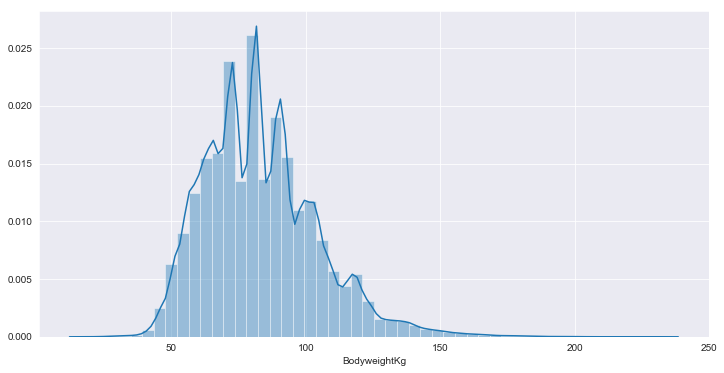

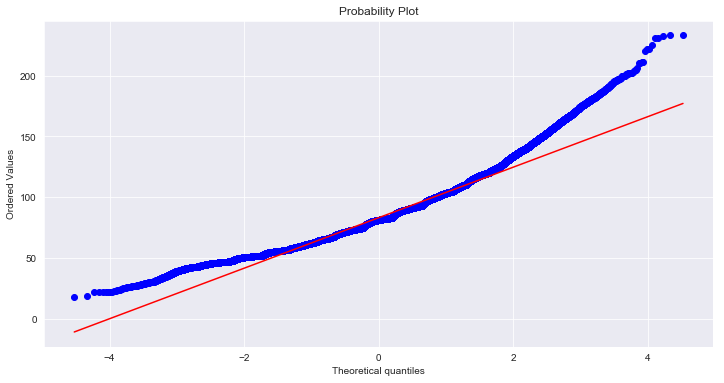

In [16]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)

df = pl[['Wilks', 'Sex', 'TotalKg', 'BodyweightKg']]
df['Sex'].replace(['F','M'],[0,1],inplace=True)

# BodyweightKg
sns.distplot(df['BodyweightKg'])
plt.show()
res = stats.probplot(df['BodyweightKg'], plot=plt)

Okay, BodyweightKg is not normal. It shows right skewness and does not follow the diagonal line. But a simple data transformation can fix this, a log transformation.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


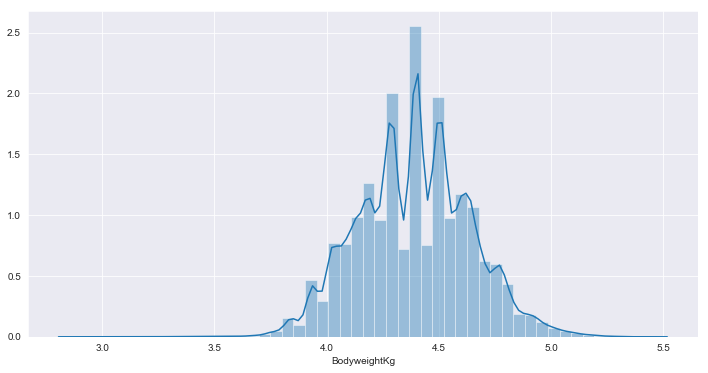

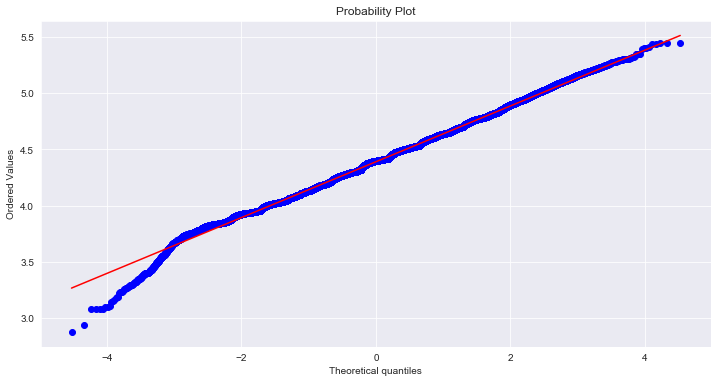

In [17]:
df['BodyweightKg'] = np.log(df['BodyweightKg'])

sns.distplot(df['BodyweightKg'])
plt.show()
res = stats.probplot(df['BodyweightKg'], plot=plt)

We only require our outcome variable to have a normal distribution so let's move onto checking for homoscedasticity.

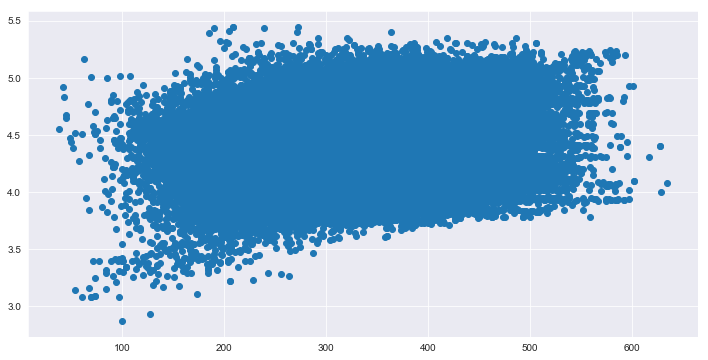

In [18]:
plt.scatter(df['Wilks'], df['BodyweightKg'])
plt.show()

The variance here looks constant so lets check the other.

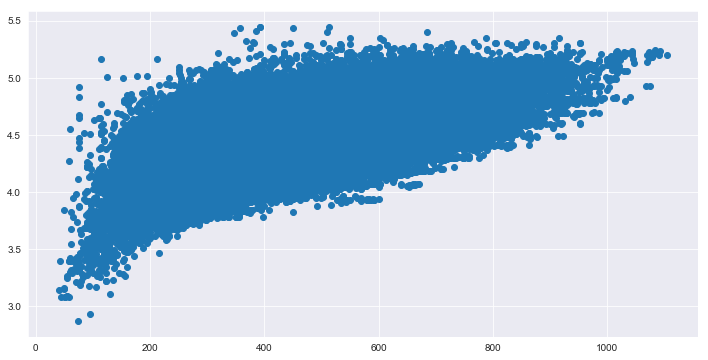

In [19]:
plt.scatter(df['TotalKg'], df['BodyweightKg'])
plt.show()

Here we can see that we obviously do not have constant variance, we can fix this with a simple log transformation.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


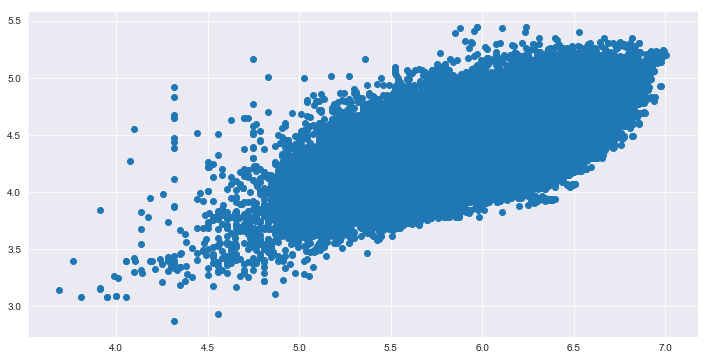

In [20]:
df['TotalKg'] = np.log(df['TotalKg'])

plt.scatter(df['TotalKg'], df['BodyweightKg'])
plt.show()

This looks much better!

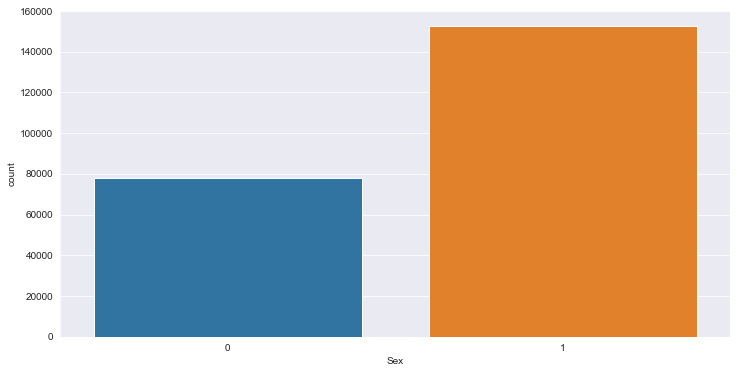

In [21]:
# Sex
sns.countplot(df['Sex'])
plt.show()

Here we have a decent amount of both labels for our category variable so it can fit the assumption.

In [22]:
poly = PolynomialFeatures(degree=5)
X = poly.fit_transform(df[['Wilks', 'Sex', 'TotalKg']])
y = df[['BodyweightKg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_train)
trainError = np.sqrt(np.mean((y_hat - y_train)**2))
print("Training error (RMSE) = %.4f" % trainError)

y_test_hat = model.predict(X_test)
testError = np.sqrt(np.mean((y_test_hat - y_test)**2))
print("Test error (RMSE) = %.4f" % testError)

Training error (RMSE) = 0.0196
Test error (RMSE) = 0.0202


We can see the model performed extremely well. I chose a degree of 5 because I know the Wilks coefficient formula is actually a 5 degree polynomial. The weights also differ for males and females which could explain why our error isn't exactly zero. Another possibility is the rounding of the Wilks coefficient in the dataset.

### Finding a new Wilks Formula

The official Wilks formula looks like 
$$
Coeff = \frac{500}{a + bx + cx^2 + dx^3 + ex^4 + fx^5}
$$
Where $x$ is bodyweight and to get the Wilks point we multiply weight lifted by the coefficient. In addition, the $a,b,c,d,e,f$ are different for males and females. <br> <br> For males 
$$
a=-216.0475144, \:\:
b=16.2606339, \:\:
c=-0.002388645, \:\:
d=-0.00113732, \:\:
e=7.01863E-06, \:\:
f=-1.291E-08 \:\:
$$

<br> For females 
$$
a=594.31747775582, \:\:
b=-27.23842536447, \:\:
c=0.82112226871, \:\:
d=-0.00930733913, \:\:
e=4.731582E-05, \:\:
f=-9.054E-0 \:\:
$$ <br>
Let's try to learn a Wilks formula for both males and females.

Training error (RMSE) = 0.0946
Test error (RMSE) = 0.0946


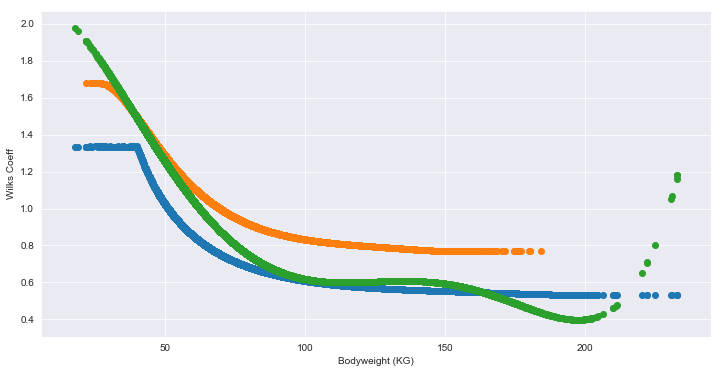

array([ 0.00000000e+00,  8.97435893e-03, -1.03608062e-03,  1.37282588e-05,
       -6.95087375e-08,  1.23005926e-10])

In [23]:
poly = PolynomialFeatures(degree=5)
X = poly.fit_transform(pl[['BodyweightKg']])
y = pl['Wilks'] / pl['TotalKg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_train)
trainError = np.sqrt(np.mean((y_hat - y_train)**2))
print("Training error (RMSE) = %.4f" % trainError)

y_test_hat = model.predict(X_test)
testError = np.sqrt(np.mean((y_test_hat - y_test)**2))
print("Test error (RMSE) = %.4f" % testError)

male = pl[pl['Sex'] == 'M']
female = pl[pl['Sex'] == 'F']

plt.scatter(male['BodyweightKg'], male['Wilks'] / male['TotalKg'])
plt.scatter(female['BodyweightKg'], female['Wilks'] / female['TotalKg'])
plt.scatter(pl['BodyweightKg'], model.predict(X))
plt.xlabel("Bodyweight (KG)")
plt.ylabel("Wilks Coeff")
plt.show()

model.coef_

Here the blue and orange points represent the actual Wilks coefficients of males and females respectively. The orange points are our fitted Wilks coefficients where it gives a good average of the two curves. <br><br> The learned formula seems to be reasonable with a relatively low RMSE, a loose way to interpret RMSE is that on average our predicted value is "0.09" off the actual value, so when predicting such small values this RMSE is still decent. Currently females have higher Wilks coefficients across the board but with this new formula I think it would be a more 'fair' way to compare male and females Wilks since it is gender agnostic.